In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
papers = pd.read_csv('E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-1-Data/papers.csv')

In [3]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [4]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7241 non-null   int64 
 1   year        7241 non-null   int64 
 2   title       7241 non-null   object
 3   event_type  2422 non-null   object
 4   pdf_name    7241 non-null   object
 5   abstract    7241 non-null   object
 6   paper_text  7241 non-null   object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


In [5]:
papers.describe(include='all')

,id,year,title,event_type,pdf_name,abstract,paper_text
count,7241.000000,7241.000000,7241,2422,7241,7241,7241
unique,NaN,NaN,7241,3,7241,3923,7237
top,NaN,NaN,Self-Organization of Associative Database and ...,Poster,1-self-organization-of-associative-database-an...,Abstract Missing,Emergence of Object-Selective Features in\nUns...
freq,NaN,NaN,1,2146,1,3317,2
mean,3655.912167,2006.439718,NaN,NaN,NaN,NaN,NaN
std,2098.435219,8.759919,NaN,NaN,NaN,NaN,NaN
min,1.000000,1987.000000,NaN,NaN,NaN,NaN,NaN
25%,1849.000000,2000.000000,NaN,NaN,NaN,NaN,NaN
50%,3659.000000,2009.000000,NaN,NaN,NaN,NaN,NaN
75%,5473.000000,2014.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
event_types = papers.fillna('N/A').groupby(by='event_type')['id'].count().sort_values(ascending=False).to_frame()
event_types

,id
event_type,
N/A,4819
Poster,2146
Spotlight,181
Oral,95


In [7]:
papers[papers['paper_text'].duplicated(keep=False)]

,id,year,title,event_type,pdf_name,abstract,paper_text
631,1578,1998,Dynamics of Supervised Learning with Restricte...,NaN,1578-dynamics-of-supervised-learning-with-rest...,Abstract Missing,Dynamics of Supervised Learning with\nRestrict...
632,1579,1998,Discovering Hidden Features with Gaussian Proc...,NaN,1579-discovering-hidden-features-with-gaussian...,Abstract Missing,Dynamics of Supervised Learning with\nRestrict...
3862,4497,2012,Emergence of Object-Selective Features in Unsu...,NaN,4497-emergence-of-object-selective-features-in...,Recent work in unsupervised feature learning h...,Emergence of Object-Selective Features in\nUns...
4109,4719,2012,"Burn-in, bias, and the rationality of anchoring",NaN,4719-burn-in-bias-and-the-rationality-of-ancho...,Bayesian inference provides a unifying framewo...,Emergence of Object-Selective Features in\nUns...
5583,6052,2016,Only H is left: Near-tight Episodic PAC RL,Poster,6052-only-h-is-left-near-tight-episodic-pac-rl...,In many applications such as advertisement pla...,Launch and Iterate: Reducing Prediction Churn\...
5584,6053,2016,Launch and Iterate: Reducing Prediction Churn,Poster,6053-launch-and-iterate-reducing-prediction-ch...,Practical applications of machine learning oft...,Launch and Iterate: Reducing Prediction Churn\...
5722,6178,2016,Regret Bounds for Non-decomposable Metrics wit...,Poster,6178-regret-bounds-for-non-decomposable-metric...,We consider the problem of recommending releva...,
6499,6879,2017,Mean Field Residual Networks: On the Edge of C...,Poster,6879-mean-field-residual-networks-on-the-edge-...,We study randomly initialized residual network...,


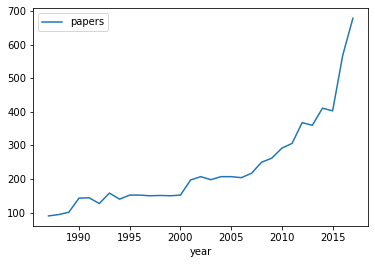

In [8]:
papers_per_year = papers.groupby(by='year')['id'].count().to_frame()
papers_per_year.reset_index(inplace=True)
papers_per_year.plot(x='year', y='id')
plt.legend(['papers'])

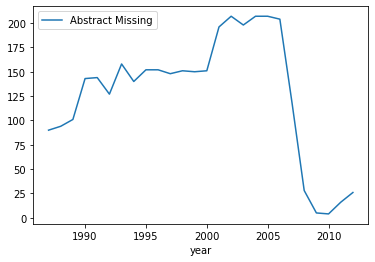

In [9]:
abstract_missing_year = papers.query('abstract == "Abstract Missing"').groupby(by='year')['abstract'].count().to_frame()
abstract_missing_year.reset_index(inplace=True)
abstract_missing_year.plot(x='year', y='abstract')
plt.legend(['Abstract Missing'])

<AxesSubplot:xlabel='year'>

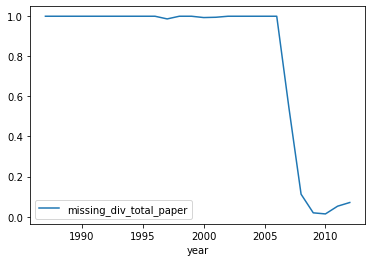

In [10]:
abstract_missing_year['missing_div_total_paper'] = abstract_missing_year['abstract'] / papers_per_year['id']

abstract_missing_year.plot(x='year', y='missing_div_total_paper')

In [11]:
authors = pd.read_csv('E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-1-Data/authors.csv')

In [12]:
authors.head()

,id,name
0,1,Hisashi Suzuki
1,10,David Brady
2,100,Santosh S. Venkatesh
3,1000,Charles Fefferman
4,10000,Artur Speiser


In [13]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9784 non-null   int64 
 1   name    9784 non-null   object
dtypes: int64(1), object(1)
memory usage: 153.0+ KB


In [14]:
authors.describe(include='all')

,id,name
count,9784.000000,9784
unique,NaN,9719
top,NaN,Stella X. Yu
freq,NaN,3
mean,5213.869276,NaN
std,3101.338416,NaN
min,1.000000,NaN
25%,2506.750000,NaN
50%,4958.500000,NaN
75%,8021.250000,NaN


In [15]:
authors[authors['name'].duplicated(keep=False)].groupby(by='name')['id'].count().sort_values(ascending=False).to_frame()

,id
name,
Daniel D. Lee,3
Stella X. Yu,3
Abhradeep Guha Thakurta,2
Murat A. Erdogdu,2
Quoc V. Le,2
...,...
Jianbo Shi,2
Jo?o F. Henriques,2
Joachim M. Buhmann,2


In [16]:
paper_authors = pd.read_csv('E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-1-Data/paper_authors.csv')

In [17]:
paper_authors.head()

,id,paper_id,author_id
0,1,63,94
1,2,80,124
2,3,80,125
3,4,80,126
4,5,80,127


In [18]:
paper_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20838 entries, 0 to 20837
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         20838 non-null  int64
 1   paper_id   20838 non-null  int64
 2   author_id  20838 non-null  int64
dtypes: int64(3)
memory usage: 488.5 KB


In [19]:
papers_per_auth = paper_authors.groupby(by='author_id')['paper_id'].count().sort_values(ascending=False).to_frame()
papers_per_auth.reset_index(inplace=True)
papers_per_auth.rename(columns={"paper_id":"count"}, inplace=True)
papers_per_auth

,author_id,count
0,330,79
1,1472,62
2,178,60
3,121,58
4,1020,51
...,...,...
9779,4228,1
9780,4226,1
9781,4222,1
9782,4221,1


In [31]:
authors.query('id == 330')

,id,name
3007,330,Michael I. Jordan


In [20]:
papers_per_auth.describe(include='all')

,author_id,count
count,9784.000000,9784.000000
mean,5213.869276,2.129804
std,3101.338416,3.245723
min,1.000000,1.000000
25%,2506.750000,1.000000
50%,4958.500000,1.000000
75%,8021.250000,2.000000
max,10482.000000,79.000000


<AxesSubplot:>

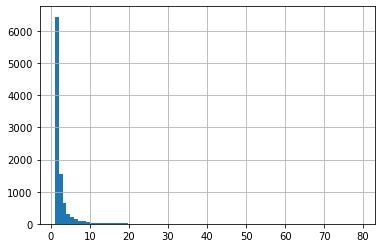

In [32]:
papers_per_auth['count'].hist(bins=79)

<AxesSubplot:>

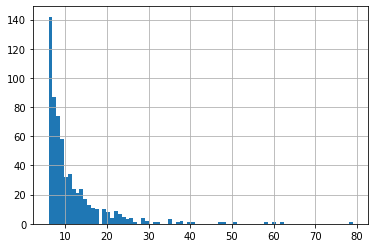

In [33]:
papers_per_auth.query('count > 5')['count'].hist(bins=79)

In [23]:
papers_per_auth.query('count >= 5').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 0 to 827
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   author_id  828 non-null    int64
 1   count      828 non-null    int64
dtypes: int64(2)
memory usage: 19.4 KB


In [24]:
papers_per_auth.query('count >= 10').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   author_id  260 non-null    int64
 1   count      260 non-null    int64
dtypes: int64(2)
memory usage: 6.1 KB


In [25]:
auth_per_paper = paper_authors.groupby(by='paper_id')['author_id'].count().sort_values(ascending=False).to_frame()
auth_per_paper.reset_index(inplace=True)
auth_per_paper.rename(columns={"author_id":"count"}, inplace=True)
auth_per_paper

,paper_id,count
0,2889,18
1,7152,15
2,6771,13
3,4687,12
4,4016,12
...,...,...
7233,2451,1
7234,4374,1
7235,4376,1
7236,1645,1


In [26]:
auth_per_paper.describe(include='all')

,paper_id,count
count,7238.000000,7238.000000
mean,3654.690108,2.878972
std,2097.995851,1.358598
min,1.000000,1.000000
25%,1848.250000,2.000000
50%,3657.500000,3.000000
75%,5470.750000,4.000000
max,7284.000000,18.000000


<AxesSubplot:>

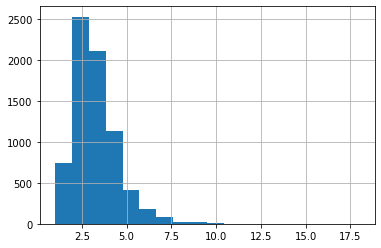

In [27]:
auth_per_paper['count'].hist(bins=18)

In [28]:
papers_and_authors = papers.merge(paper_authors, left_on='id', right_on='paper_id', suffixes=('_paper', '_author'))\
    .drop(['id_paper', 'id_author'], axis=1)
papers_and_authors.head()

,year,title,event_type,pdf_name,abstract,paper_text,paper_id,author_id
0,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,1,1
1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,1,2
2,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,10,14
3,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,100,155
4,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,100,54


In [29]:
papers_and_authors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20838 entries, 0 to 20837
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        20838 non-null  int64 
 1   title       20838 non-null  object
 2   event_type  8151 non-null   object
 3   pdf_name    20838 non-null  object
 4   abstract    20838 non-null  object
 5   paper_text  20838 non-null  object
 6   paper_id    20838 non-null  int64 
 7   author_id   20838 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.4+ MB


In [30]:
datapath = 'E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-1-Data/papers_and_authors.csv'
papers_and_authors.to_csv(datapath, index=False)